<a href="https://colab.research.google.com/github/preetiknw/AIML_foodhub/blob/main/AIML_foodhubipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/AIML_foodhub/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape # returns dimension of the dataframe

(1898, 9)

#### Observations:

There are **1898** rows and **9** columns in the given foodhub Dataframe


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info() # returns the summary of dataframe including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

  Datatypes used in this foodhub dataset are: -
*   4 Columns are of Integer(64 bytes)
*   1 Column is of Float(64 bytes)
*   4 Columns are of Object datatype

So, In total 5 numerical columns and 4 object type columns - All have no missing (i.e., non-null) values across all columns

All of the datatypes are appropriate for their respected variables except Rating column.

Rating column is being read as object type column but it should be numeric column.

***Total memory used = 133.6 KB***

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isna().sum()     # returns the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df['rating'].unique()    # returns unique ratings

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:

There are no missing values/NaN in the initial data in the given foodhub dataset

We can see that there are mixed data type values in the '**rating**' column like - ['Not given', '5', '3', '4'] - '**Not given**' value could   actually be read as missing value (NaN).

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe() # returns stats for all numerical columns
# or
# df.describe(include='all').T

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

Food Preparation TIme: On Average it takes **27.37** minutes to prepare food after the order is placed.

Minimum time to prepare food once an order is placed is **20.00** mins wheras maximum time is **35.00** minutes

For food preparation time mean and median are same









### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df[df['rating'] == 'Not given'].value_counts().sum() # count of orders where rating is not provided by customer

736

#### Observations:

Not rated orders are **736** in the foodhub dataset from the total of 1898 orders resulting in 1162 rated orders


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.nunique() # returns unique values for each column

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Cost of Orders

In [ ]:
#returns Total cost for all orders
df['cost_of_the_order'].sum()

31314.82

In [ ]:
# Returns total cost of all orders per customer and assign to new dataframe called df_Customer
df_Customer = df.groupby('customer_id')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
df_Customer[df_Customer['cost_of_the_order'] > 100]

,customer_id,cost_of_the_order
0,52832,225.80
1,250494,183.83
2,47440,158.18
3,276192,146.46
4,83287,139.31
5,259341,130.81
6,97991,122.03
7,82041,120.92
8,115213,115.40
9,60039,109.76


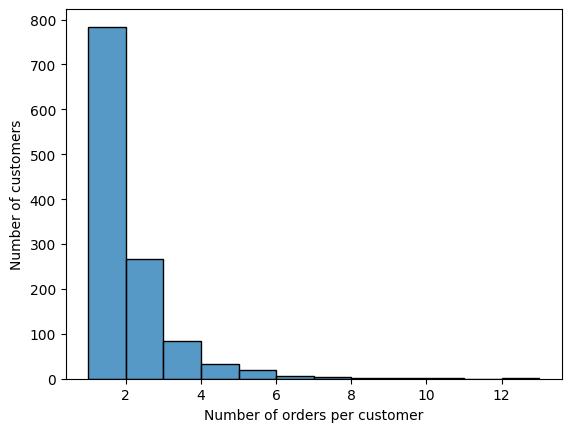

In [ ]:
# Histogram showing number of orders per customer

myplt = sns.histplot(df.customer_id.value_counts(), binwidth=1)
myplt.set(xlabel="Number of orders per customer")
myplt.set(ylabel='Number of customers')
plt.show()

In [ ]:
# Returns total number of customers who ordered less then 2 times
round(df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)<2).sum()

784.0

In [ ]:
# Returns the percentage who ordered greater than 5 times for all customers
round(((df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)>5).sum()/ df['customer_id'].nunique()) * 100,2)

1.17

In [ ]:
# Returns the percentage who ordered less than or equal to 2 times for all customers
round(((df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)<=2).sum()/ df['customer_id'].nunique()) * 100,2)

87.58

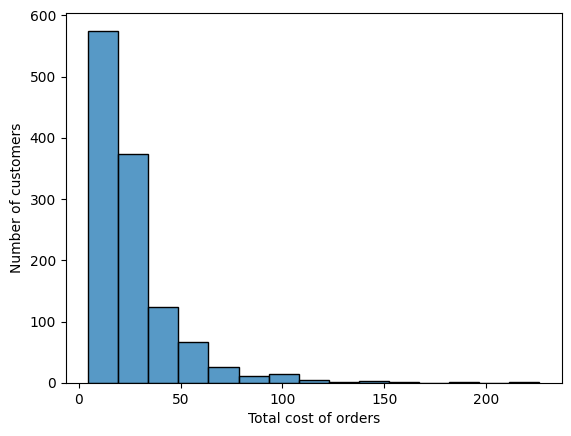

In [ ]:
# # Histogram showing total cost of orders for customer
myplt = sns.histplot(df_Customer.cost_of_the_order, binwidth=15)
myplt.set(xlabel="Total cost of orders")
myplt.set(ylabel='Number of customers')
plt.show()


In [ ]:
# Returns total cost of all orders per customer and assign to new dataframe called df_Customer
df_cust = df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).reset_index()
df_cust.shape

(1200, 2)

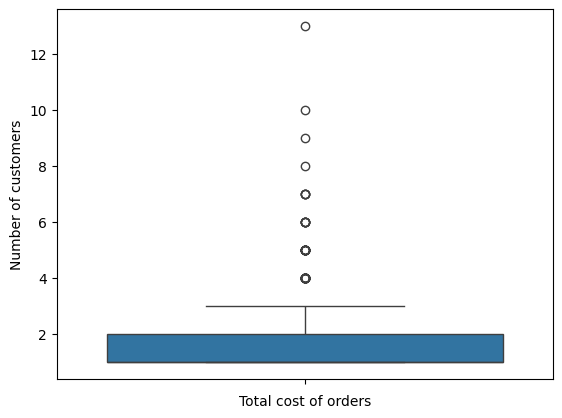

In [ ]:
# # Histogram showing total cost of orders for customer
myplt = sns.boxplot( y = df_cust.order_id)
myplt.set(xlabel="Total cost of orders")
myplt.set(ylabel='Number of customers')
plt.show()

In [ ]:
df_cust.describe()

,customer_id,order_id
count,1200.000000,1200.000000
mean,177202.828333,1.581667
std,117661.960754,1.090560
min,1311.000000,1.000000
25%,77543.000000,1.000000
50%,133212.000000,1.000000
75%,294304.000000,2.000000
max,405334.000000,13.000000


In [ ]:
## tobe deleted
#df_Customer.head()
#df[df['customer_id'] == 52832]
dfcopy = df
dfcopy['rating'] = dfcopy['rating'].replace(['Not given'],np.nan)  # Replace 'Not given' rating to NaN
dfcopy['rating'] = dfcopy['rating'].astype(float) # Convert rating column from object to Float
newDF = dfcopy[dfcopy.restaurant_name.isin(['Shale Shack','Blue Ribbon Sushi Izakaya'])]
newDF.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,Revenue,total_time
count,2.900000e+01,29.000000,29.000000,18.000000,29.000000,29.000000,29.00000,29.000000
mean,1.477505e+06,156128.310345,16.727241,4.333333,28.724138,23.482759,3.21019,52.206897
std,5.692825e+02,107386.529982,7.894101,0.840168,5.119267,4.380319,2.42028,6.940458
min,1.476673e+06,44472.000000,6.790000,3.000000,20.000000,15.000000,1.01850,40.000000
25%,1.476868e+06,66373.000000,12.080000,4.000000,24.000000,21.000000,1.81200,48.000000
50%,1.477685e+06,106006.000000,14.070000,5.000000,30.000000,23.000000,2.11050,53.000000
75%,1.477992e+06,241719.000000,19.450000,5.000000,33.000000,26.000000,2.91750,57.000000
max,1.478367e+06,396432.000000,33.030000,5.000000,35.000000,32.000000,8.25750,65.000000


In [ ]:
print(df_Customer.head(100).cost_of_the_order.sum() / df_Customer.cost_of_the_order.sum()) # Revenue by top 100 customers/Total cost
print(df_Customer.head(300).cost_of_the_order.sum() / df_Customer.cost_of_the_order.sum()) #Revenue by top 25% customers/Total cost


0.2496054583740223
0.5067281242555441


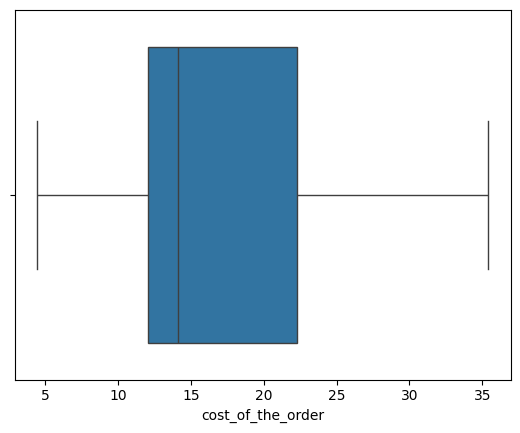

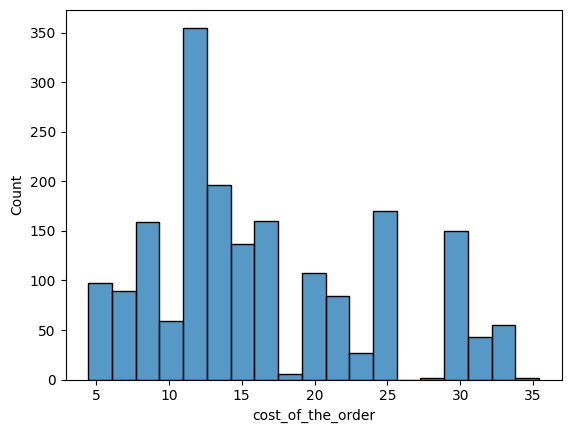

In [ ]:
myplt = sns.boxplot(data = df, x='cost_of_the_order')
plt.show()
myplt = sns.histplot(data = df, x='cost_of_the_order')
plt.show()

In [ ]:
# returns percent of orders which cost less than $15.00 (// todo times 100)
df[df['cost_of_the_order'] <15.00]['order_id'].count()/df['order_id'].count()

0.5310853530031612

In [ ]:
print(df[(df['cost_of_the_order']>=10.00) & (df['cost_of_the_order'] <=15.00)]['order_id'].count())
print(df[df['cost_of_the_order'] <20.00]['order_id'].count()) # returns number of orders which cost less than $20



614
1343



*   All of the orders are in range of 4 dollars and 36 **dollars**

*   Frequent orders are between 10 dollar and $15

*   Order cost is slightly Postively Skewed or Right Skewed

*   Approx only 1.17% customers have more than 5 orders.

*   87.58% customers have 2 or less orders.

*   Approx. more than 750 customers have only one single order

*   Top 25 percent of customers provide 50% of the total cost of all orders

*   Top 100 customers provide 25% of the total cost of all orders

*   Approx 1300 orders cost less than $20












#### Restaurant Name

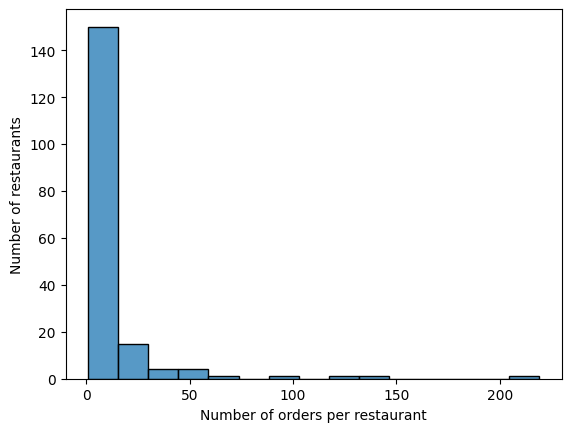

In [ ]:
# plots histogram plotting the number of orders for each restaurant
myplt = sns.histplot(df.restaurant_name.value_counts(), binwidth = 15)
myplt.set(ylabel="Number of restaurants")
myplt.set(xlabel='Number of orders per restaurant')
plt.show()

In [ ]:
# Groups the data by restaurant and returns total number of orders per restaurant
df_restaurant_order = df.groupby('restaurant_name')['order_id'].count().sort_values(ascending = False).reset_index()
print(df_restaurant_order)

               restaurant_name  order_id
0                  Shake Shack       219
1            The Meatball Shop       132
2            Blue Ribbon Sushi       119
3    Blue Ribbon Fried Chicken        96
4                         Parm        68
..                         ...       ...
173                      Klong         1
174          Kambi Ramen House         1
175                 Il Bambino         1
176                Hunan Manor         1
177              Lamarca Pasta         1

[178 rows x 2 columns]


In [ ]:
# Groups the data by restaurant and sum the cost of all orders associated with customer
df_restaurant_cost = df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()
print(df_restaurant_cost)

                restaurant_name  cost_of_the_order
0                   Shake Shack            3579.53
1             The Meatball Shop            2145.21
2             Blue Ribbon Sushi            1903.95
3     Blue Ribbon Fried Chicken            1662.29
4                          Parm            1112.76
..                          ...                ...
173                Market Table               6.79
174                     Wa Jeal               6.74
175      Cipriani Le Specialita               5.92
176  Big Wong Restaurant _¤¾Ñ¼               5.92
177                 Hunan Manor               5.72

[178 rows x 2 columns]


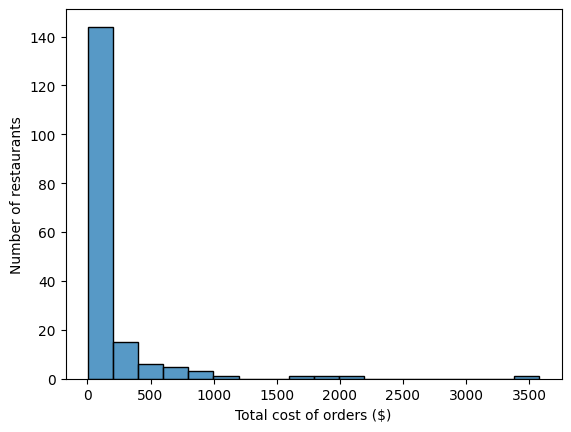

In [ ]:
#plots histogram plotting the total cost of orders, from lowest to highest, for each restaurant
ax = sns.histplot(df_restaurant_cost.cost_of_the_order,binwidth=200)
ax.set(ylabel="Number of restaurants")
ax.set(xlabel='Total cost of orders ($)')
plt.show()

In [ ]:
#returns the percent of total orders for top 5 restaurants
round ((df_restaurant_order.head(5).order_id.sum() / df['order_id'].nunique()) * 100, 2)

33.4

In [ ]:
#returns the percent of total orders for top 10% restaurants
round ((df_restaurant_order.head(18).order_id.sum() / df['order_id'].nunique()) * 100, 2)

60.33

In [ ]:
#returns the percent of total order cost for top 10% restaurants
round ((df_restaurant_cost.head(18).cost_of_the_order.sum() / df['cost_of_the_order'].sum()) * 100, 2)

60.27

In [ ]:
#returns the percent of total cost of all orders for top 3 restaurants
round ((df_restaurant_cost.head(3).cost_of_the_order.sum() / df['cost_of_the_order'].sum()) * 100, 2)

24.36


Top 5 restaurants get approx 33% of orders

Top 3 restaurants generate approx 24% of total cost


Approx the top 10% resturants fulfilled 60% of the total cost of all orders

Most orders are from **Shale Shack restaurant** followed by **The** **Meatball shop** and **Blue Ribbon Sushi**






####  Cuisine Type

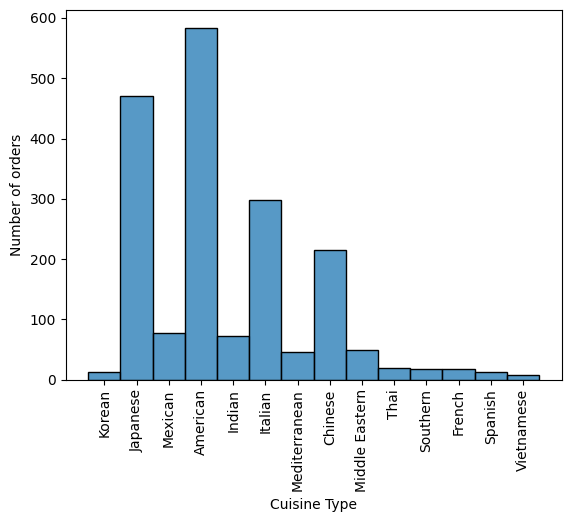

In [ ]:
#plots histogram of the number of orders for each cuisine
myplt=sns.histplot(data=df, x='cuisine_type')
myplt.tick_params(axis='x', rotation=90)
myplt.set(xlabel='Cuisine Type')
myplt.set(ylabel='Number of orders')
plt.show()


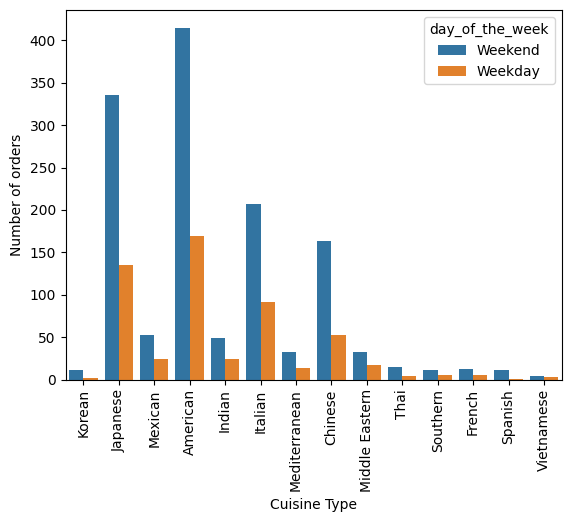

In [ ]:
#plots histogram of the number of orders for each cuisine type type for Wekend and Weekday

myplt=sns.countplot(data=df, x='cuisine_type' ,hue='day_of_the_week')
myplt.tick_params(axis='x', rotation=90)
myplt.set(xlabel='Cuisine Type')
myplt.set(ylabel='Number of orders')
plt.show()


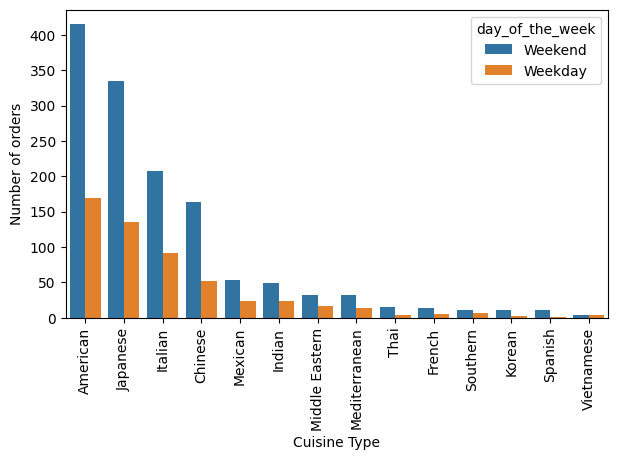

In [ ]:
plt.figure(figsize=(7,4))
myplt = sns.countplot(data=df, x='cuisine_type', order= df['cuisine_type'].value_counts().index, hue='day_of_the_week')
myplt.tick_params(axis='x', rotation=90)
myplt.set(xlabel='Cuisine Type')
myplt.set(ylabel='Number of orders')
plt.show()


In [ ]:
#returns the total number of orders associated with the top-three cuisine types
cuisine = (df[df.cuisine_type=='American']['order_id']).count()+(df[df.cuisine_type=='Italian']['order_id']).count()+(df[df.cuisine_type=='Japanese']['order_id']).count()
print(cuisine)


1352


In [ ]:
round((cuisine / df['order_id'].count()) * 100,2) # returns the percentage of orders from top-three cuisine types

71.23

In [ ]:
# returns the percentage of orders from top-most cuisine type - American
round((df[df.cuisine_type=='American']['order_id']).count() / df['order_id'].count() * 100,2)


30.77

In [ ]:
print(df[df.day_of_the_week=='Weekend']['order_id'].count()) # returns weekend orders
round(df[df.day_of_the_week=='Weekend']['order_id'].count() / df['order_id'].count() * 100,2) # returns percent for weekend orders


1351


71.18


Top 3 cuisine types are American, Japanese and Italian which comprises of little more than 70% of all orders

American cuisine alone comprises of approx 30% of all orders

Approx more than 70 percent of orders are from Weekends only

A little more than 1300 orders are placed on Weekend and only approx 500+ are placed on Weekdays

For all Cuisine types Orders on Weekend are more than than of Weekdays

For all cuisine types weekend orders are twice as weekday orders except Vietnames cuisine where the weekend orders and weekday orders are similar

####Rating

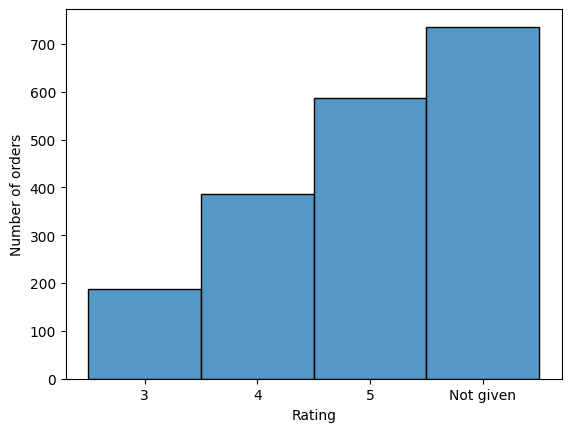

In [ ]:
#returns histpplot of orders by rating
myplt=sns.histplot(data=df.sort_values('rating'), x='rating')
myplt.set(xlabel='Rating')
myplt.set(ylabel='Number of orders')
plt.show()

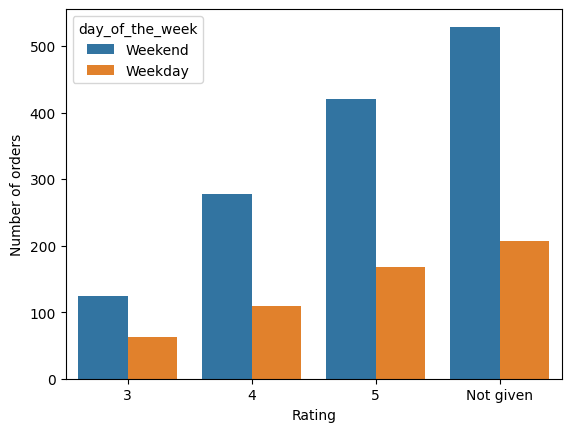

In [ ]:
#returns histpplot of orders by rating
myplt=sns.countplot(data=df.sort_values('rating'), x='rating', hue='day_of_the_week')
myplt.set(xlabel='Rating')
myplt.set(ylabel='Number of orders')
plt.show()

In [ ]:
round(df[df['rating']== 'Not given']['order_id']. count()/df['order_id'].count() * 100,2) # returns percent of customers where rating is not provided

38.78

In [ ]:
round(df[df['rating']== '5']['order_id']. count()/df['order_id'].count() * 100,2) # returns percent for rating = 5

30.98


Approx more than 700 orders have not recieved any rating

Little less than 600 orders have recived rating of 5

Little less than 400 orders have recived rating of 4

Little less than 200 orders have recived rating of 3

Appox. 38% of order are not rated and 30% of orders are rated 5






#### Food preparation Time

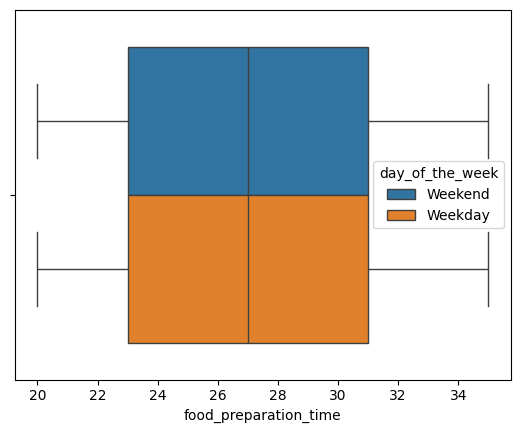

In [ ]:
sns.boxplot(data = df, x = 'food_preparation_time', hue='day_of_the_week');


Food Preparation time is same on weekdays as weel as on weekends (20 to 35 mins)

Food prep time has Symmetric distribution (Mean and median for food preparation time is same (close to 27 mins))

#### Delivery Time

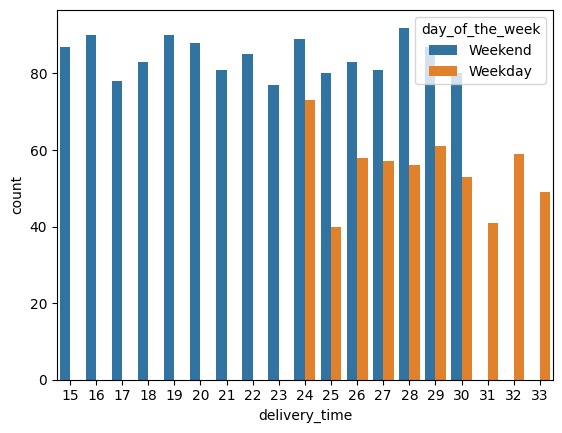

In [ ]:
sns.countplot(data = df, x = 'delivery_time', hue='day_of_the_week');


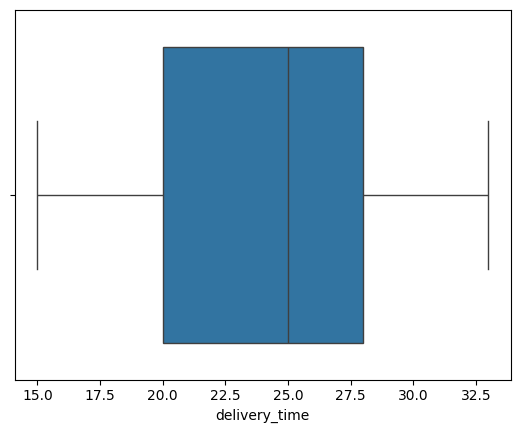

In [ ]:
sns.boxplot(data = df, x = 'delivery_time');


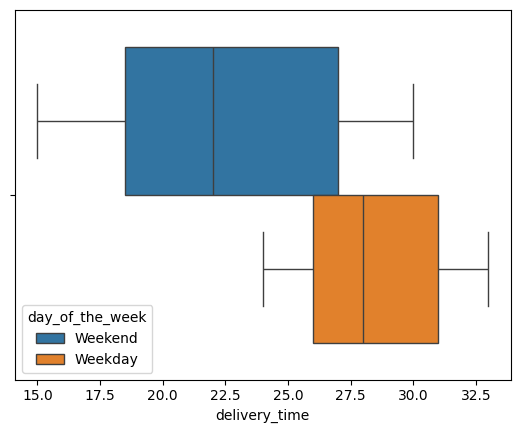

In [ ]:
sns.boxplot(data = df, x = 'delivery_time' ,hue='day_of_the_week');



Food Delivery time is more on weekdays as compared to on weekends

Average Delivery time is 24 mins

On weekends mininmum food delivery time is 15 mins whereas on weekdays it is 24 mins

Maximum deleivery time is 30 mins on Weekends but it is 33 mins on Weekdays

No Outliers in data

#### Observations

There are total 1898 Uniques orders with 1200 customers and 14 different Cuisines and 178 restaurants

Top 3 cuisines are American, Japanese and Italian which comprises of little more than 70% of all orders wheras Vietnamese, Korean, Spanish have very less orders

Top 5 restaurants get approx 33% of orders wheras Top 10% of restaurants get 60% of orders

Top 25 percent of customers provides 50% of the total cost for all orders. Max order cost is $35.41

Most orders cost range is in between $10 and $15

Cost of the order is slightly Postively Skewed or Right Skewed with no outliers

Approx 88% customers have less than 3 orders and Approx 1300 orders cost less than $20

Most orders are for Shale Shack restaurant followed by The Meatball shop and Blue Ribbon Sushi generating 24% of total cost

American cuisine alone comprises of approx 30% of all orders

More than 70% of orders are from Weekends only

For all cuisine types weekend orders are twice as weekday orders except Vietnames cuisine where the weekend orders and weekday orders are similar

More than 700 orders have not recieved any rating resulting in 38% of orders are not rated and 30% of orders are rated as **5**

Food Preparation time is same on weekdays as well as on weekends (20 to 35 mins)

No Skewness for food prep time - hence Symmetric distribution (Mean and median for food preparation time is same) (close to 27 mins)

Food Delivery time is more on weekdays as compared to on weekends

On weekends mininmum food delivery time is 15 mins whereas on weekdays it is 24 mins wheras Maximum deleivery time is 30 mins on Weekends but it is 33 mins on Weekdays

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5) # returns top 5 restaurants with highest number of orders

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

Following are top 5 most ordered restaurants

Shake Shack  
The Meatball Shop        
Blue Ribbon Sushi      
Blue Ribbon Fried Chicken  
Parm                    


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts() # returns frequencies of cusines types on Weekends
#df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:

The top most Cuisine on Weekends is ***American***
followed by Japanese and Italian

Vietnamese is the least ordered cusine on Weekend

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
orders_over20 = df[df['cost_of_the_order']>20].shape[0] # Returns Total number of orders over $20
round(((orders_over20 / df.shape[0]) * 100),2) # Calculate percentage

29.24

#### Observations:

**29.24%** of all orders costs more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean() # Returns the average delivery time

24.161749209694417

#### Observations:

On Average it takes **24.16** minutes to deliver food after its prepared.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

df['customer_id'].value_counts().head(3)  ## Returns top 3 most frequent customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

Customers with ID **52832 , 47440 and 83287** are eligible to recieve 20% discount vouchers as they have **13, 10 and 9** orders respectively

In [ ]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


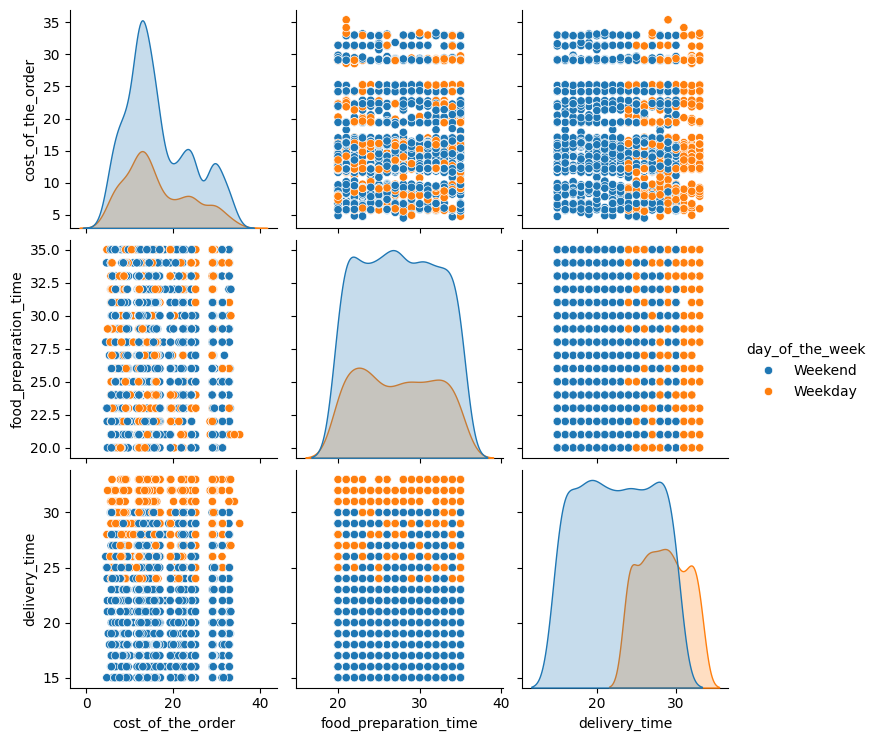

In [ ]:
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time' ], hue='day_of_the_week');

No Linear relation between columns

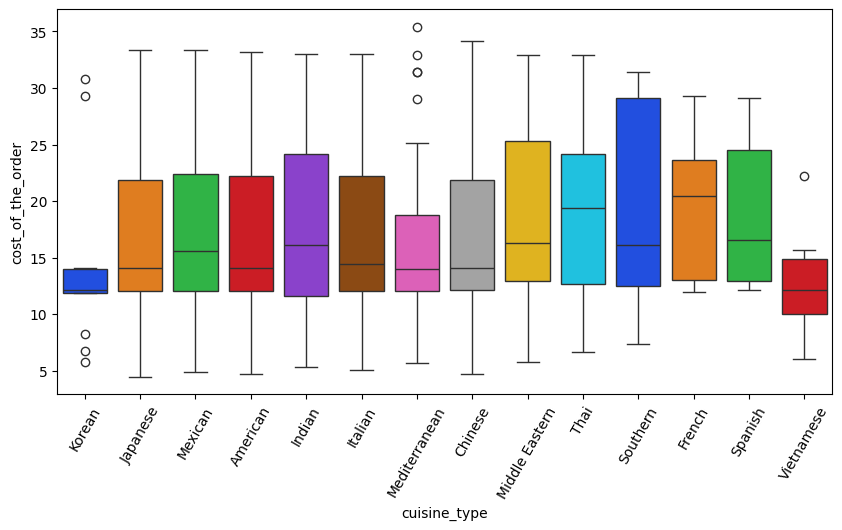

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(10,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'bright', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

[Text(0, 0.5, 'Cost of orders')]

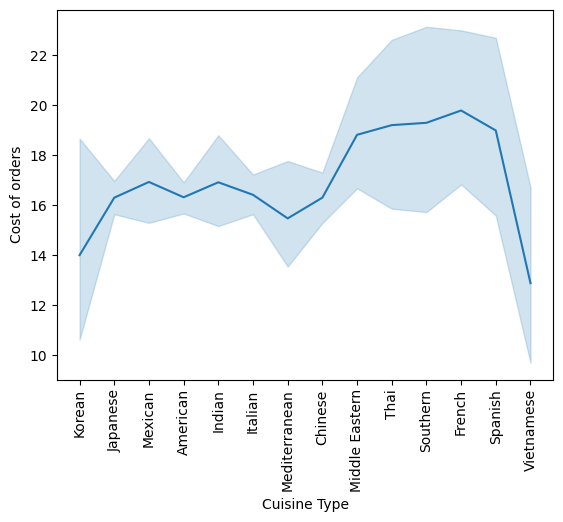

In [ ]:
# Relationship between cost of the order and cuisine type
myplt= sns.lineplot(data=df, y = 'cost_of_the_order', x = 'cuisine_type');
myplt.tick_params(axis='x', rotation=90)
myplt.set(xlabel='Cuisine Type')
myplt.set(ylabel='Cost of orders')

French Cuisine is most expensive where minimum order is 12 dollars and average order cost more than $20

Korean food is cheapest followed by Vietnames food.

Meditarrean cuisine has the most expensive order as outlier

American and Chinese cuisines have same average cost

French Cuisine costs between 10 and 30 dollars



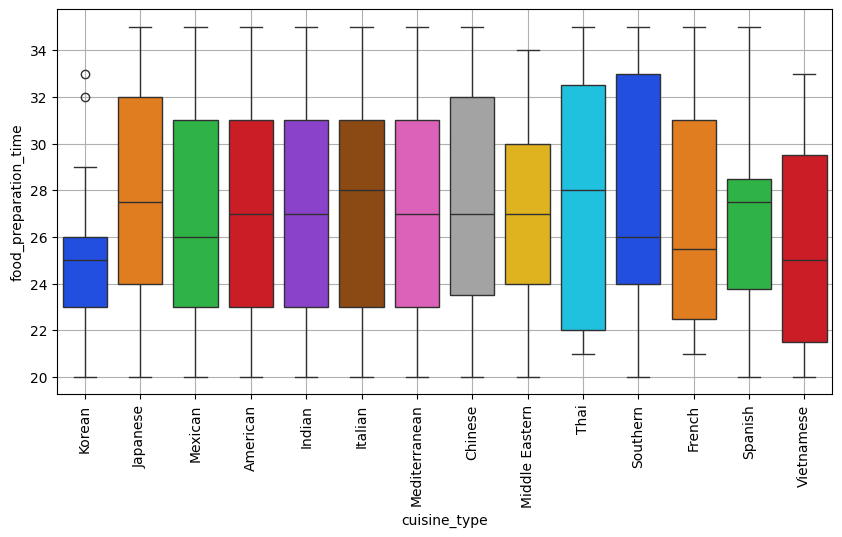

In [ ]:
# Relation between Cuisine type vs Food Preparation Time
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time', palette = 'bright', hue = 'cuisine_type')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Thai and Italian have the highest average food preparation time followed by Japanese and Spanish

Korean food has least preparation time followed by Vietnamese

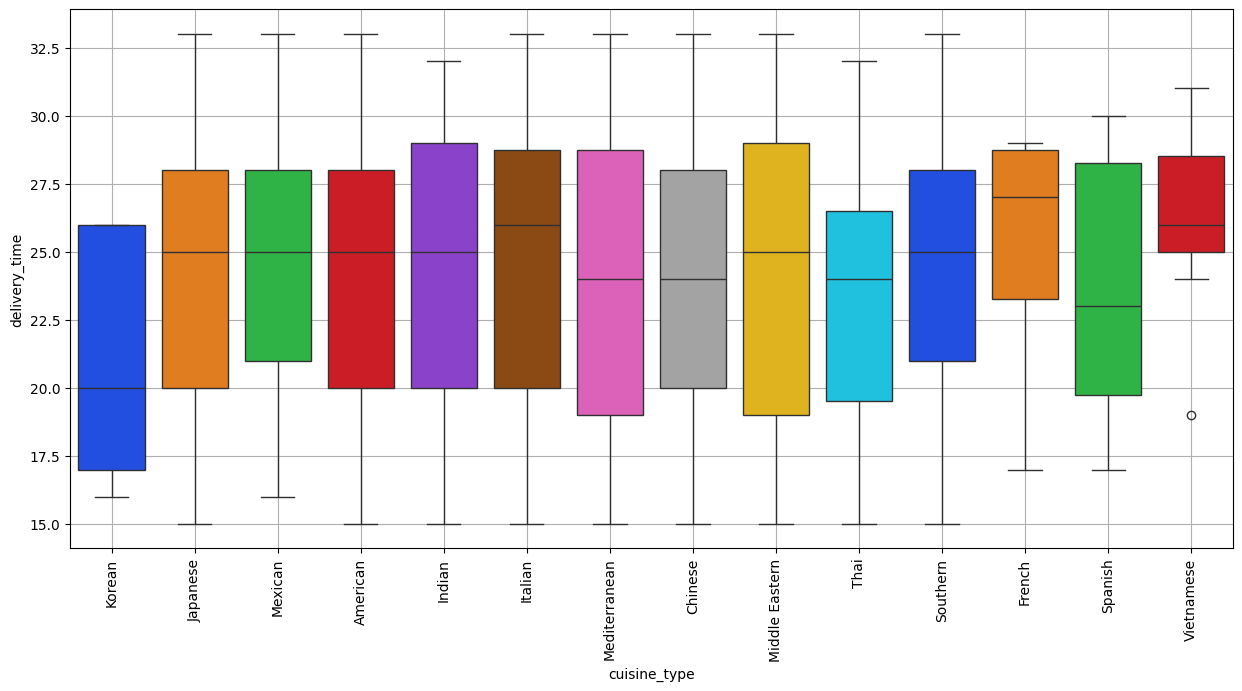

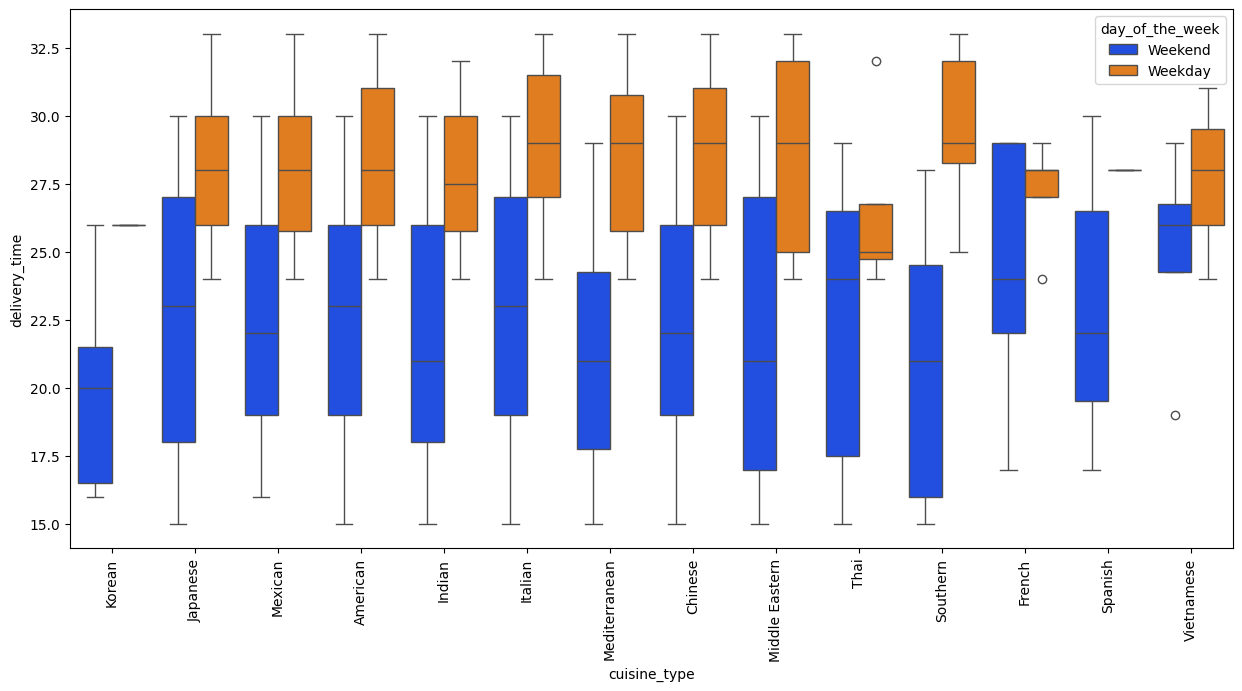

In [ ]:
# relation between Cuisine type vs Food Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time', palette = 'bright', hue='cuisine_type')
plt.xticks(rotation=90)
plt.grid()
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time', palette = 'bright', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Average Delivery time for French Cuisine type is highest followed by Vietnamese and Italian cusisine

Korean Cuisine has least delivery time followed by Spanish cuisine

Korean and Spanish cuisines have only 1 weekday delivery

Weekday deliveries takes more time than Weekend deliveries

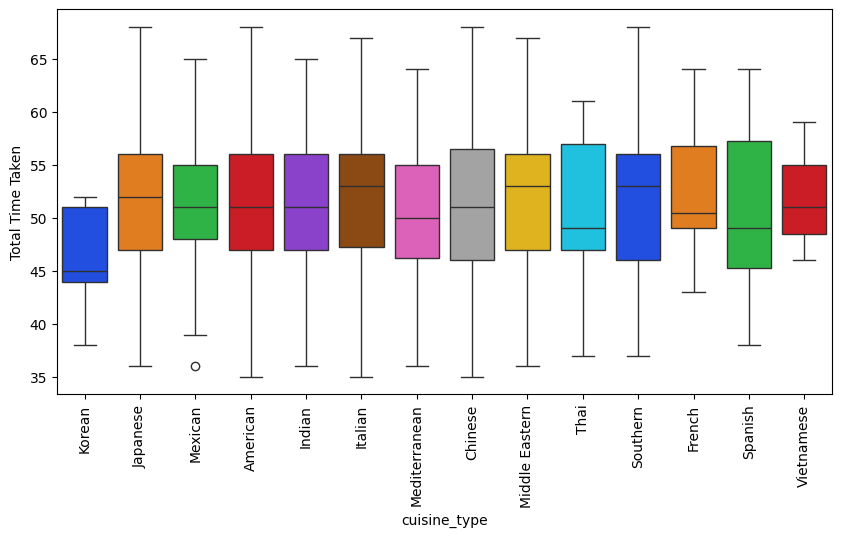

In [ ]:
# relation between Cuisine type vs Total Time Taken
total_time = df['delivery_time'] + df['food_preparation_time']
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y=total_time, palette = 'bright', hue='cuisine_type')
plt.xticks(rotation=90)
plt.ylabel('Total Time Taken')
plt.show()

Average total time taken once the order is placed by all cuisines is close to 50 mins except for Korean which is 45 mins

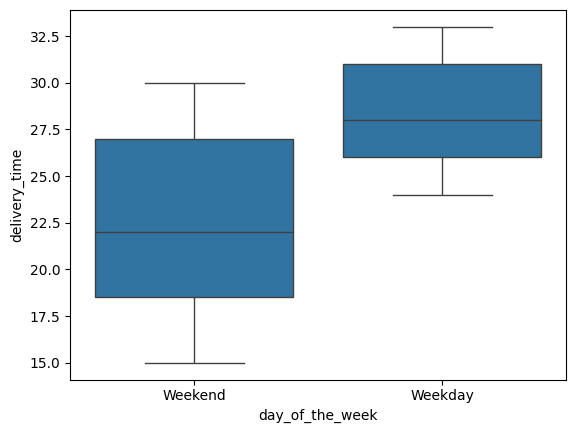

In [ ]:
# Relation between Day of the Week and Delivery Time
sns.boxplot(data = df, x = 'day_of_the_week', y='delivery_time');
plt.show()

Minimmum delivery time on Weekdays is 24 mins whereas on Weekends it is 15 mins

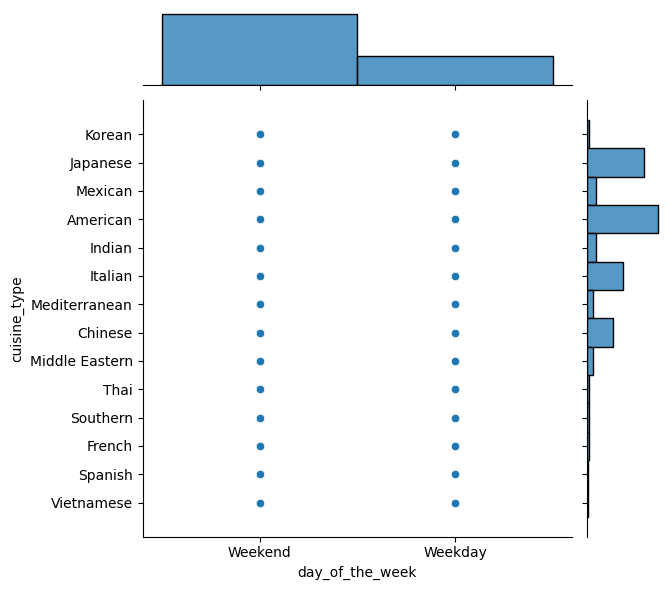

In [ ]:
# Relation between Day of the Week and Cuisine Type
sns.jointplot(data = df, x = 'day_of_the_week', y='cuisine_type');
plt.show()

American cuisine has more orders followed by Japanese and italian

Weekend has twice the orders as compared to Weekdays

---



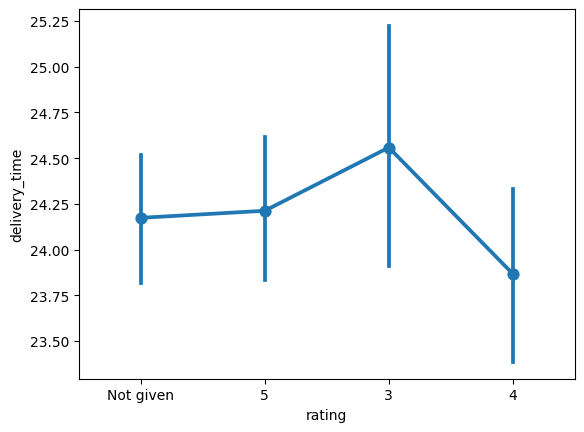

In [ ]:
# Relation between Rating vs Food Delivery time
sns.pointplot(data=df, x='rating', y = 'delivery_time') ;

Rating Decreases if the delivery time is more



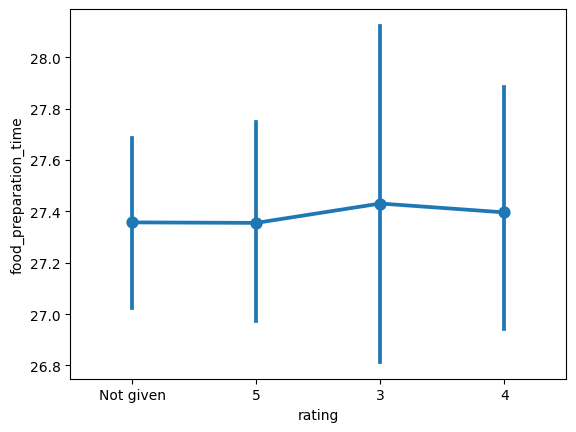

In [ ]:
# Relation between Rating vs Food preparation time
sns.pointplot(data=df, x='rating', y = 'food_preparation_time');

Rating 3 has little higher preparation time

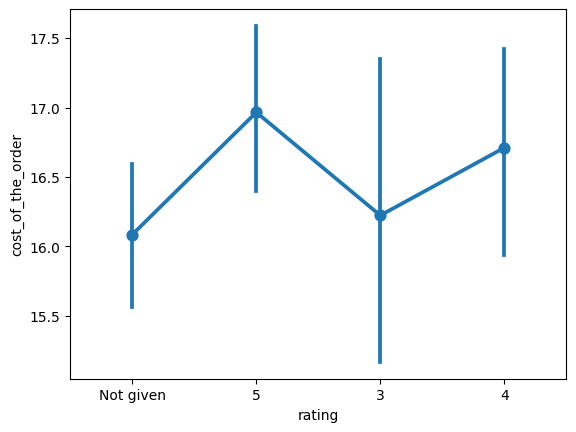

In [ ]:
# Relation between Rating vs Order cost
sns.pointplot(data=df, x='rating', y = 'cost_of_the_order');

Rating 5 has highest order cost




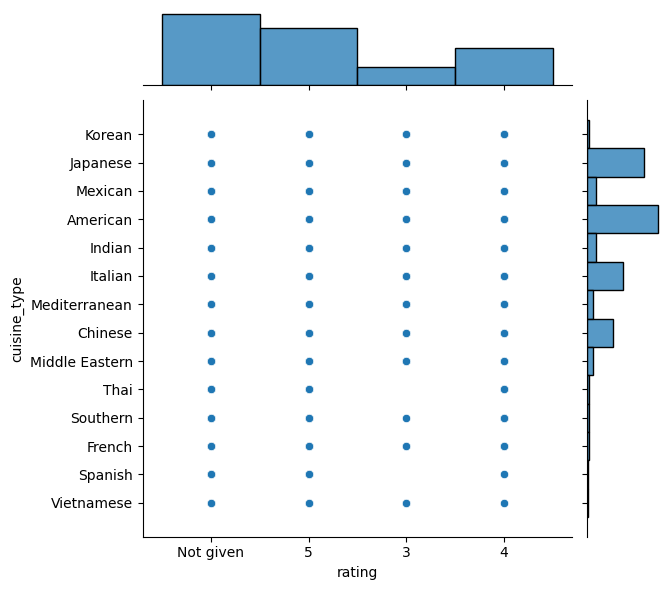

In [ ]:
# Relation between Rating and Cuisine Type
sns.jointplot(data = df, x = 'rating', y='cuisine_type')
plt.show()

Most orders didn't recieve any rating
Most orders are rated 5 followed by 4 and then 3
American cuisine recieved most ratings followed by Japanese and Italian



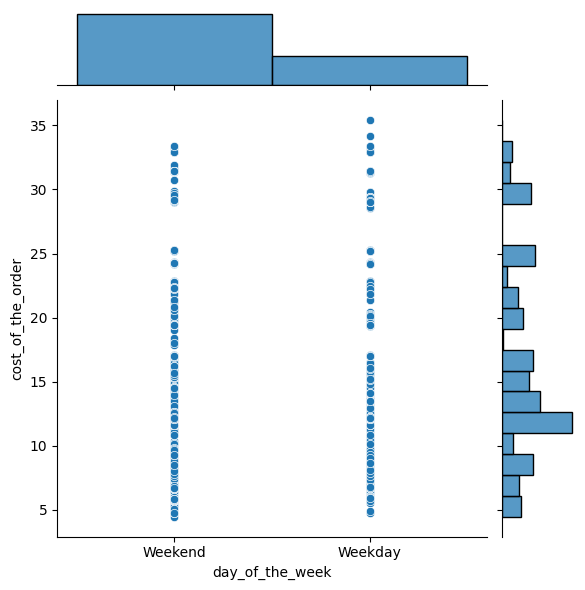

In [ ]:
# Relation between day of the week and cost of the order
sns.jointplot(data = df, x = 'day_of_the_week', y='cost_of_the_order')
plt.show()


Most orders cost between 10 and 15 dollars



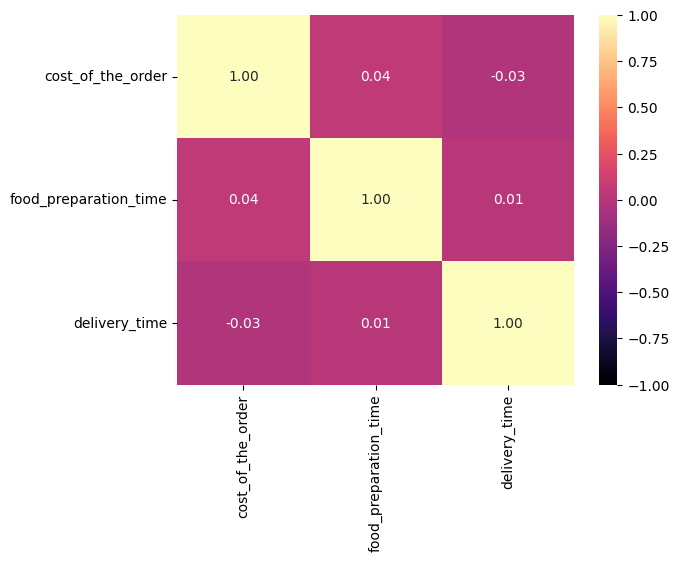

In [ ]:
# corelation among variables
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="magma")
plt.show()

very less Positive corelation between food preparation time and cost of the order - If the food prep time increases cost increases.

very less negative correlation between Delivery time and cost of the order

In [ ]:
# Returns total cost - by restaurant
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)


restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

In [ ]:
# Returns mean delivery time - by cuisine type

df.groupby(['cuisine_type'])['delivery_time'].mean().sort_values(ascending = False).head(14)

cuisine_type
Vietnamese        26.142857
French            25.333333
Italian           24.567114
Mexican           24.389610
American          24.193493
Japanese          24.131915
Indian            24.082192
Middle Eastern    24.081633
Chinese           23.855814
Southern          23.823529
Mediterranean     23.586957
Spanish           23.416667
Thai              23.157895
Korean            20.923077
Name: delivery_time, dtype: float64

In [ ]:
# Returns Average delivery time in minutes - by cuisisne type and week

df.groupby(['cuisine_type', 'day_of_the_week'])['delivery_time'].mean().sort_values(ascending = False)

cuisine_type    day_of_the_week
Southern        Weekday            29.500000
Chinese         Weekday            28.826923
Italian         Weekday            28.802198
Mediterranean   Weekday            28.785714
Middle Eastern  Weekday            28.470588
Mexican         Weekday            28.250000
American        Weekday            28.248521
Japanese        Weekday            28.133333
Spanish         Weekday            28.000000
Vietnamese      Weekday            27.666667
Indian          Weekday            27.625000
French          Weekday            27.200000
Thai            Weekday            26.500000
Korean          Weekday            26.000000
Vietnamese      Weekend            25.000000
French          Weekend            24.615385
Spanish         Weekend            23.000000
Italian         Weekend            22.705314
Mexican         Weekend            22.641509
American        Weekend            22.542169
Japanese        Weekend            22.519403
Indian          Weekend

In [ ]:
df.groupby(['restaurant_name'])['delivery_time'].mean().sort_values(ascending = False)

restaurant_name
Sarabeth's West       33.0
Taro Sushi            32.0
Haru Gramercy Park    32.0
Frank Restaurant      31.0
Haandi                30.5
                      ... 
Galli Restaurant      16.0
The MasalaWala        15.0
Paul & Jimmy's        15.0
Hibino                15.0
Gaia Italian Cafe     15.0
Name: delivery_time, Length: 178, dtype: float64

Following restaurants generate revenue over 2000 dollars

Shake Shack and The Meatball Shop

Korean cuisine have least delivery time whereas Vietnamese has most delivery time.

#### Observations:

Shake Shack and The Meatball Shop restaurants generate revenue over 2000 dollars

Most orders cost between 10 and 15 dollars

French Cuisine is most expensive where minimum order is 12 dollars and average order cost more than $20

Meditarrean cuisine has the most expensive order as outlier

American and Chinese cuisines have same average cost wheras Korean food is cheapest followed by Vietnames food.

American cuisine has more orders followed by Japanese and italian

Thai and Italian have the highest average food preparation time followed by Japanese and Spanish wheras Korean food has least preparation time followed by Vietnamese

Average Delivery time for Vietnamese and French cuisine is high and for Korean it is lowest

Average total time taken once the order is placed by all cuisines is close to 50 mins except for Korean which is 45 mins:

Minimmum delivery time on Weekdays is 24 mins whereas on Weekends it is 15 mins

Korean and Spanish cuisines have only 1 weekday delivery

Weekday deliveries takes more time than Weekend deliveries

very less Positive corelation between food preparation time and cost of the order - If the food prep time increases cost increases.

very less negative correlation between Delivery time and cost of the order

No Linear relation between any columns

Weekend orders are more as compared to on Weekdays Orders on Weekends are twice as compared to Weekday orders

Rating Decreases if the delivery time is more Rating 3 has little higher delivery time

Rating 5 has highest order cost

Most orders didn't recieve any rating and of the rated orders - Most orders are rated 5 followed by 4 and then 3

American cuisine recieved most ratings followed by Japanese and Italian








### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

dfcopy=df.copy() # makes a copy of dataframe

dfcopy['rating'] = dfcopy['rating'].replace(['Not given'],np.nan)  # Replace 'Not given' rating to NaN

dfcopy['rating'] = dfcopy['rating'].astype(float) # Convert rating column from object to Float

In [ ]:
# Returns subset of restaurants which have more than 50 ratings

count_rating = dfcopy.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
count_rating[count_rating.rating > 50]

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# Calculate average rating of restaurants which have more than 50 ratings

print(dfcopy[dfcopy['restaurant_name']=='Shake Shack'].rating.mean())
print(dfcopy[dfcopy['restaurant_name']=='The Meatball Shop'].rating.mean())
print(dfcopy[dfcopy['restaurant_name']=='Blue Ribbon Sushi'].rating.mean())
print(dfcopy[dfcopy['restaurant_name']=='Blue Ribbon Fried Chicken'].rating.mean())


4.2781954887218046
4.511904761904762
4.219178082191781
4.328125


#### Observations:

*Only* **4** restaurants have more than 50 ratings and their average rating is 4 or more.

The following four restaurants qualify for this promotional offer:

Shake Shack

The Meatball Shop

Blue Ribbon Sushi

Blue Ribbon Fried Chicken


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Define the function which calculates the revenue
def calculate_rev(order_cost):
    if order_cost > 20:
        return order_cost * 0.25
    elif order_cost > 5:
        return order_cost * 0.15
    else:
        return order_cost

df['Revenue'] = df['cost_of_the_order'].apply(calculate_rev) ## Write to the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# Returns the net revenue
net_rev = df['Revenue'].sum() ## Returns total net revenue
print('The net revenue is around', round(net_rev, 2), 'dollars')

The net revenue is around 6209.04 dollars



#### Observations:

The company could generate an additional **6209.04 dollars** by charging restaurants



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

df['total_time']=df['food_preparation_time']+ df['delivery_time'] # Returns total time to deliver the food
round (((df[df.total_time>60].shape[0]) / df.shape[0] * 100), 2) # Calculate percentage


10.54

#### Observations:

 **10.54** percent of customer's orders take over 60 minutes to deliver food once an order is placed


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(),2),
     'minutes')

The mean delivery time on weekdays is around 28.34 minutes


In [ ]:
print('The mean delivery time on Weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(),2),
     'minutes')

The mean delivery time on Weekends is around 22.47 minutes


#### Observations:

On Average, Deliveries on Weekdays takes 5.87 minutes longer than Weekends deliveries - as weekends deliveries take 22.47 minutes on average wheras weekdays deliveries take only 28.34 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

There are total 1898 Uniques orders with 1200 customers and 14 different Cuisines and 178 restaurants

Top 3 cuisines are American, Japanese and Italian which comprises of little more than 70% of all orders wheras Vietnamese, Korean, Spanish have very least number of orders

Most popular restaurants are Shake Shack , The Meatball Shop and Blue Ribbon Sushi. Shake Shack and The Meatball Shop restaurants generate revenue over 2000 dollars

Of all the total 1898 orders 736 are not rated

Most expensive cuisine is French cuisine where minimum order is 12 dollars and average order cost more than $20. American and Chinese cuisines have same average cost wheras Korean food is cheapest followed by Vietnames food.

Minimum cost of the order is 4.47 and maximum is 35.41 dollars. Most orders cost between 10 and 15 dollars

Food Delivery time is more on weekdays as compared to on weekends.Minimmum delivery time on Weekdays is 24 mins whereas on Weekends it is 15 mins.

Average Delivery time for French and Vietnamese cuisine is very high and for Korean it is lowest.

Food preparatinn time is same on Weekdays as well as on Weekends ranging from 20 mins to 35 mins. Thai and Italian have the highest average food preparation time followed by Japanese and Spanish wheras Korean food has least preparation time followed by Vietnamese

Once the order is placed total time for most of the cuisine is little over 50 mins except Korean cuisine, which is around 45 minutes. **10.54** percent of customer's orders take over an hour to deliver food once an order is placed

Most of the orderes were placed on weekend. For all cuisine types weekend orders are twice as weekday orders except Vietnames cuisine where the weekend orders and weekday orders are similar

There is no linear relationship between any columns

very less Positive corelation between food preparation time and cost of the order - If the food prep time increases cost increases.

very less negative correlation between Delivery time and cost of the order

87.58% customers have 2 or less orders. More than 750 customers have only one single order





### Recommendations:

*  For all cuisine types weekend orders are twice as weekday orders - Discount coupons/Promo offers should be launched for weekdays to attract customers on Weekdays

* Promo offers to be launched for cuisine types which has less orders like Vietnamese, Korean and Spanish

* Rating decreases to 3 if the delivery time is higher. Improvemnt in terms of delivery time may be needed

* 38% orders are not rated - encourage customers to rate the orders

* Running promo offers to encourage customer to visit different cuisine as 750+ customers have only single order






---